<a href="https://colab.research.google.com/github/avisekksarma/ML-projects/blob/main/object_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:03<00:00, 42939149.12it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
len(test_dataset)

10000

In [4]:
# creating dataloader (train) and dataloader (test)
batch_size = 64
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

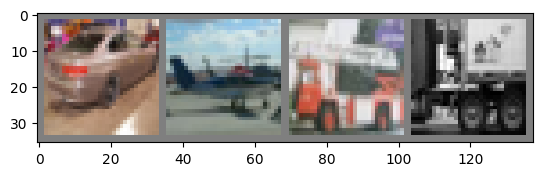

car   plane truck truck


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

images = images[0:4]
labels = labels[0:4]
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

In [22]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
images.shape

torch.Size([64, 3, 32, 32])

In [23]:
# creating a CNN:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 64, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(64, 256, 3)
    self.conv3 = nn.Conv2d(256, 1024, 3,padding='same')
    self.conv4 = nn.Conv2d(1024, 2048, 3,padding='same')
    self.fc1 = nn.Linear(2048*3*3, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self,x):
    # print('1')
    # print(x.shape)
    x = F.relu(self.conv1(x))
    # print('2')
    # print(x.shape)
    x = self.pool(x)
    # print('3')
    # print(x.shape)
    x = F.relu(self.conv2(x))
    # print('4')
    # print(x.shape)
    x = self.pool(x)
    # print('5')
    # print(x.shape)
    x = F.relu(self.conv3(x))
    # print('6')
    # print(x.shape)
    x = self.pool(x)
    # print('7')
    # print(x.shape)
    x = F.relu(self.conv4(x))
    # print('8')
    # print(x.shape)
    x = torch.flatten(x,1)
    # print('9')
    # print(x.shape)
    x = F.relu(self.fc1(x))
    # print('10')
    # print(x.shape)
    x = F.relu(self.fc2(x))
    # print('11')
    # print(x.shape)
    x = self.fc3(x)
    # print('12')
    # print(x.shape)
    return x

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
device

device(type='cuda')

In [26]:
num_epochs = 50
batch_size = 64
learning_rate = 0.0001

In [27]:
model = ConvNet().to(device)
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [28]:
n_total_steps = len(trainloader)
for epoch in range(num_epochs):
  running_loss = 0.0
  for i,(images,labels) in enumerate(trainloader):
    images = images.to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criteria(outputs,labels)

    # backward pass and optimize parameters
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    running_loss += loss.item()
  print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')

print('Finished Training')


[1] loss: 1.578
[2] loss: 1.186
[3] loss: 0.983
[4] loss: 0.826
[5] loss: 0.690
[6] loss: 0.572
[7] loss: 0.448
[8] loss: 0.335
[9] loss: 0.225
[10] loss: 0.144
[11] loss: 0.093
[12] loss: 0.071
[13] loss: 0.057
[14] loss: 0.053
[15] loss: 0.045
[16] loss: 0.044
[17] loss: 0.039
[18] loss: 0.036
[19] loss: 0.033
[20] loss: 0.031
[21] loss: 0.032
[22] loss: 0.027
[23] loss: 0.027
[24] loss: 0.026
[25] loss: 0.027
[26] loss: 0.020
[27] loss: 0.024
[28] loss: 0.023
[29] loss: 0.018
[30] loss: 0.022
[31] loss: 0.022
[32] loss: 0.017
[33] loss: 0.017
[34] loss: 0.018
[35] loss: 0.019
[36] loss: 0.016
[37] loss: 0.018
[38] loss: 0.015
[39] loss: 0.016
[40] loss: 0.017
[41] loss: 0.013
[42] loss: 0.014
[43] loss: 0.017
[44] loss: 0.014
[45] loss: 0.011
[46] loss: 0.016
[47] loss: 0.010
[48] loss: 0.017
[49] loss: 0.012
[50] loss: 0.014
Finished Training


In [29]:
PATH = './cnn.pth'

In [30]:
torch.save(model.state_dict(), PATH)

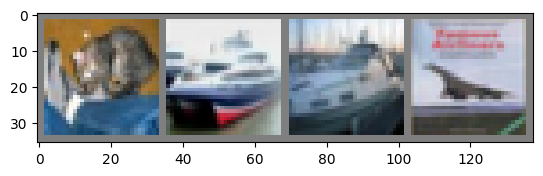

GroundTruth:  cat   ship  ship  plane


In [31]:
# now test the data
# First, lets see the test dataset images
dataiter = iter(testloader)
images, labels = next(dataiter)
images = images[0:4]
labels = labels[0:4]
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


In [32]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the path file itself
loaded_model.to(device)
loaded_model.eval()

with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(testloader.dataset)

    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

        outputs2 = loaded_model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the model in test dataset: {acc} %')

    acc = 100.0 * n_correct2 / n_samples
    print(f'Accuracy of the loaded model in test dataset: {acc} %')

Accuracy of the model in test dataset: 75.99 %
Accuracy of the loaded model in test dataset: 75.99 %


In [52]:
#TODO: Improve accuracy on both training and test dataset , by using other architectures like RESNETS.

In [33]:
# prediction and ground truth
dataiter = iter(testloader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
outputs = model(images)


In [34]:
outputs.shape

torch.Size([64, 10])

In [35]:
print(images.shape, ", ",labels.shape)

torch.Size([64, 3, 32, 32]) ,  torch.Size([64])


In [36]:
images[63].shape

torch.Size([3, 32, 32])

In [37]:
 _, predicted = torch.max(outputs, 1)

In [38]:
predicted.shape

torch.Size([64])

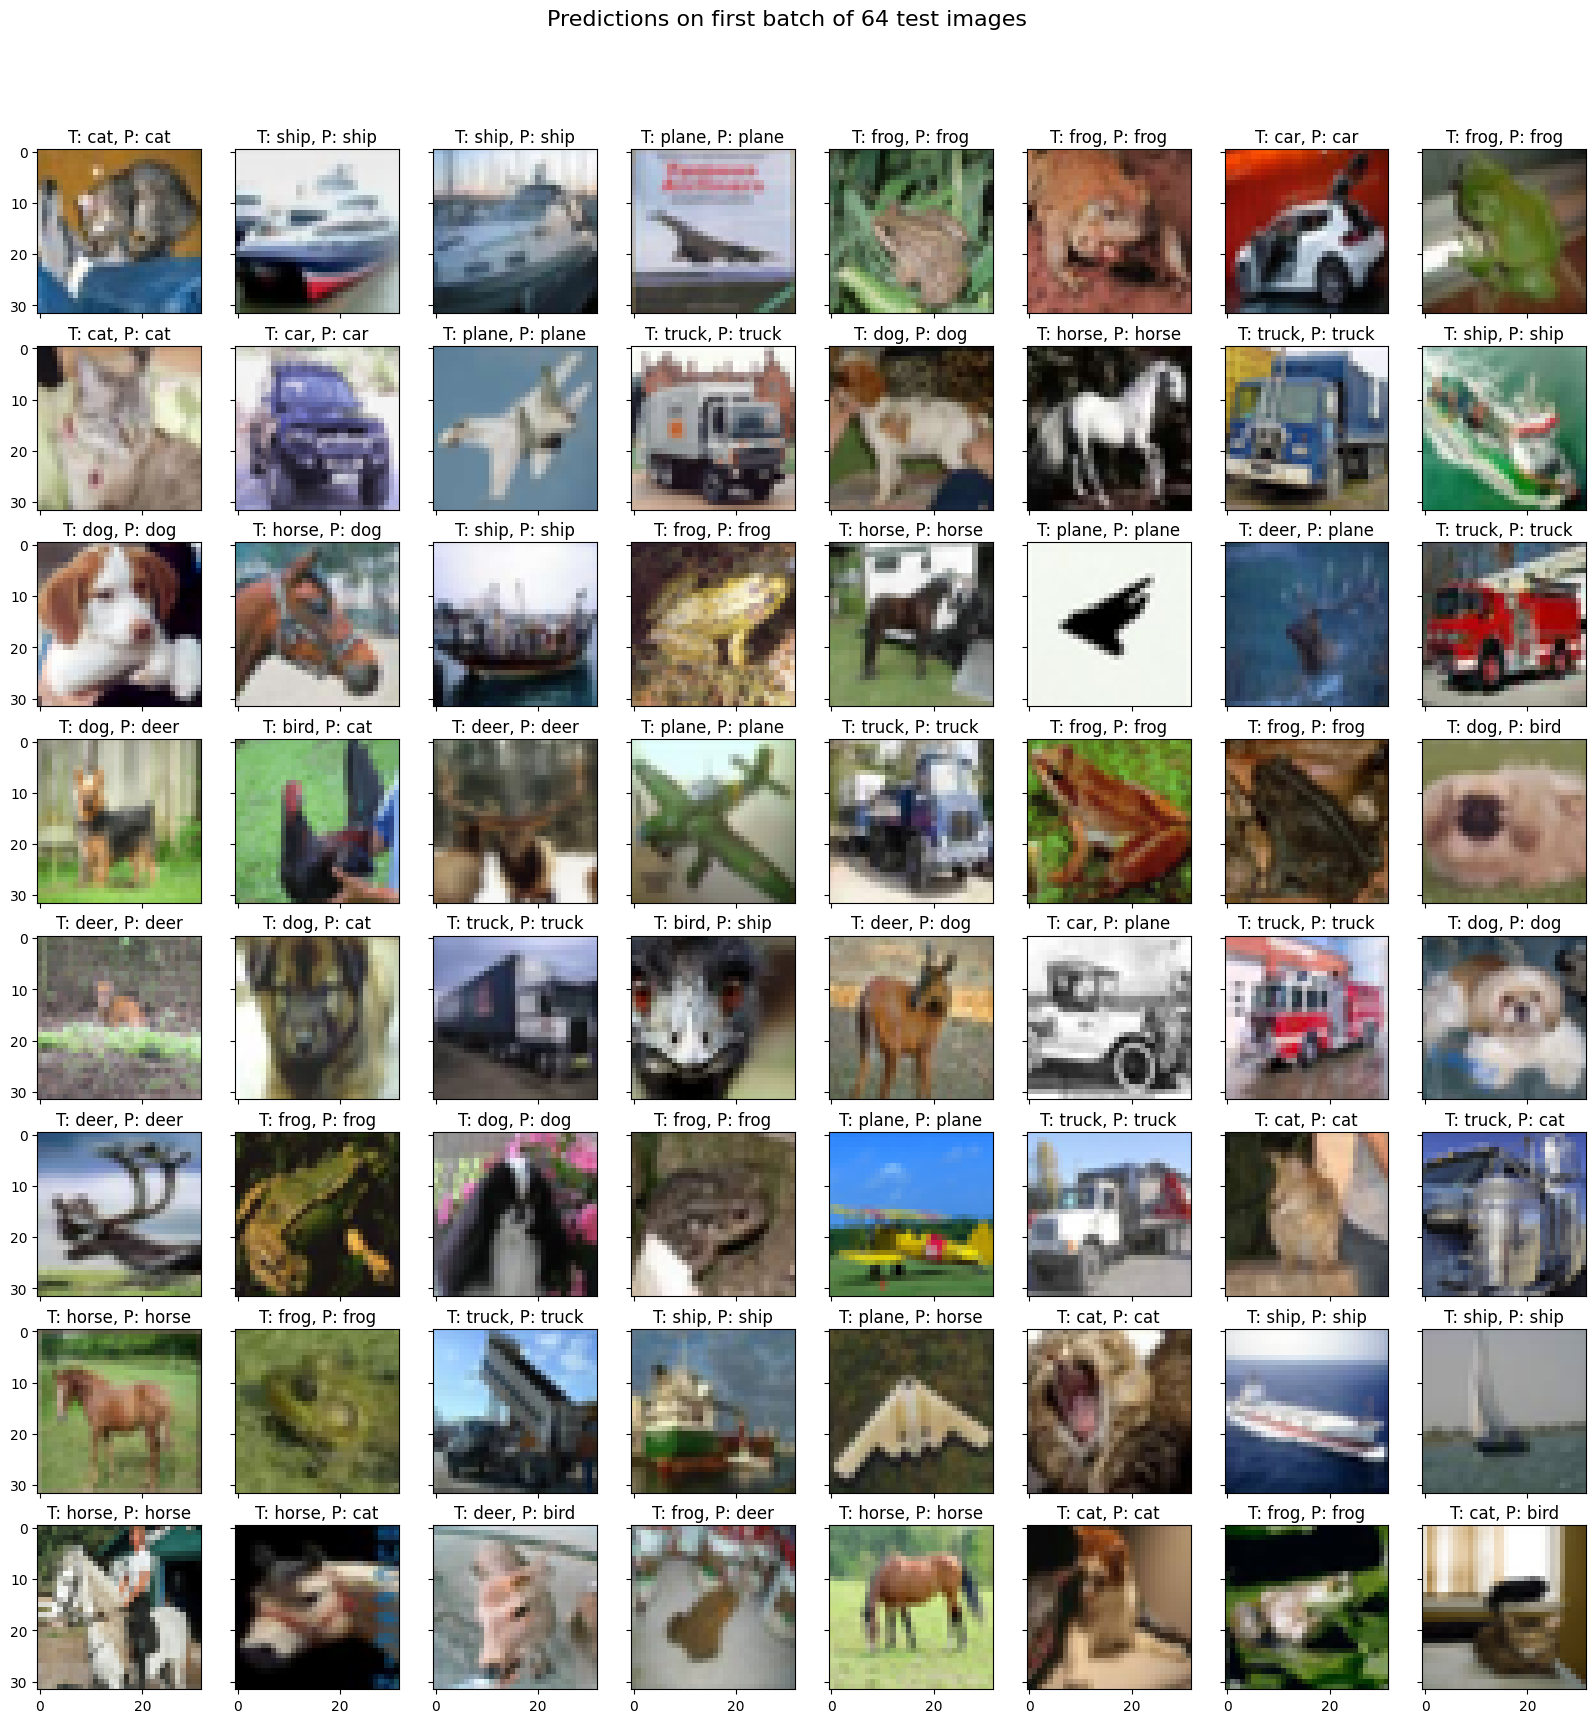

In [51]:

plot_label = labels.cpu().numpy()
plot_pred = predicted.cpu().numpy()

fig , axs = plt.subplots(8,8,sharex=True,sharey=True)
fig.set_figheight(20)
fig.set_figwidth(20)
count = 0
for row in axs:
    for col in row:
        col.set_title(f'T: {classes[plot_label[count]]}, P: {classes[plot_pred[count]]}',pad=5)
        img = images[count].cpu()
        img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        col.imshow(np.transpose(npimg, (1, 2, 0)))
        count += 1
fig.suptitle(f'Predictions on first batch of 64 test images',fontsize=16,y=0.95)
plt.show()
